In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [2]:
root = "../../../"

In [3]:
df = pd.read_csv(root + "datasets/multiclass/processed/CICDDoS_corr.csv", index_col=[0])

In [4]:
X = df.drop(columns=[' Label'])
y = df[' Label']

In [5]:
mi = mutual_info_classif(X, y)
mi

array([0.46394216, 0.19294525, 0.11553689, 1.73656942, 0.27853312,
       0.1292377 , 0.07434755, 0.1364059 , 1.58144328, 0.78766698,
       0.71315632, 0.24281576, 0.70510353, 0.68436218, 0.19102087,
       0.05882238, 0.17880151, 0.15793175, 0.19687369, 0.77694357,
       0.23491487, 1.7627661 , 0.34958531, 0.38495872, 0.10337819,
       0.02292318, 0.15561118, 0.1276462 , 0.44782918, 0.18419326,
       0.12759532, 0.52247874, 0.11636463, 0.3473374 , 0.0506829 ,
       0.02125868, 0.03723105, 0.05246483])

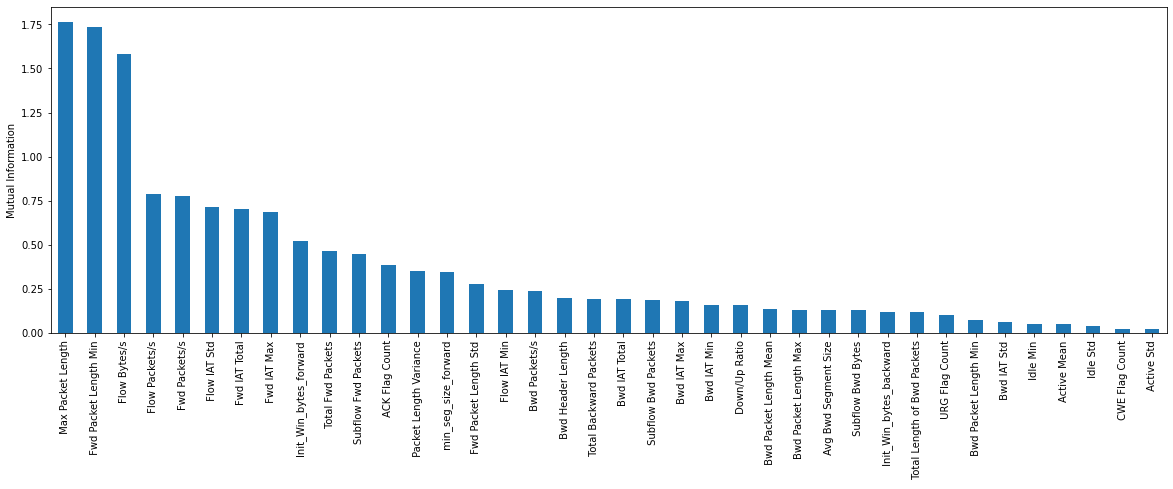

In [6]:
# 1) let's capture the above array in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a bar plot

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')
plt.savefig(root + 'pictures/all/feature_importances_mutual_info.pdf', bbox_inches='tight')

In [7]:
# here we will select the top 20 features
# based on their mutual information value

# select features
selector = SelectKBest(mutual_info_classif, k=20).fit(X, y)

# display features
X.columns[selector.get_support()]

Index([' Total Fwd Packets', ' Total Backward Packets',
       ' Fwd Packet Length Min', ' Fwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Std', ' Flow IAT Min', 'Fwd IAT Total',
       ' Fwd IAT Max', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Max Packet Length', ' Packet Length Variance', ' ACK Flag Count',
       'Subflow Fwd Packets', ' Subflow Bwd Packets', 'Init_Win_bytes_forward',
       ' min_seg_size_forward'],
      dtype='object')

In [8]:
# to remove the rest of the features:

X = selector.transform(X)

In [9]:
X.shape

(5280, 20)